<a href="https://colab.research.google.com/github/JOTOR/Examples_Python/blob/master/TF_Tree_Models_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TensorFlow Tree Based Models Comparison against Sklearn
By: Jhonnnatan Torres

Main reference: https://github.com/tensorflow/decision-forests
___

In [1]:
#Installing library
!pip install tensorflow_decision_forests --upgrade -q

     |████████████████████████████████| 6.2MB 3.6MB/s 


In [2]:
#Importing additional required libraries
import tensorflow_decision_forests as tfdf
import pandas as pd
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np
np.random.seed(1234)

In [4]:
#Loading the dataset
df = fetch_openml(name='diabetes', version=5, as_frame=True)['data']

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1


## Exploratory Data Analysis (EDA)

In [6]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,NaN
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,NaN
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,NaN
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,NaN
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,NaN


Since this is a "clean" dataset, all the features are numeric and there are not null values, since we will be working with tree based models, no additional pre-processing (Scaling, Imputing, etc.) steps are required

In [7]:
#Downloading a python file with some EDA functions / utilities
!wget https://raw.githubusercontent.com/JOTOR/Examples_Python/master/eda_tools.py
!ls

--2021-06-26 22:11:24--  https://raw.githubusercontent.com/JOTOR/Examples_Python/master/eda_tools.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 57224 (56K) [text/plain]
Saving to: ‘eda_tools.py’

eda_tools.py        100%[===================>]  55.88K  --.-KB/s    in 0.01s   

2021-06-26 22:11:24 (4.27 MB/s) - ‘eda_tools.py’ saved [57224/57224]

eda_tools.py  sample_data


In [8]:
df['Outcome'] = df['Outcome'].astype('int')

In [9]:
from eda_tools import eda_plot_cat

GENERATING AUTOMATIC EXPLORATORY DATAFRAME ANALYSIS
----------------------------------------------------
----------------------------------------------------
Features available in the DataSet:
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
----------------------------------------------------
----------------------------------------------------
DATAFRAME Type of Features:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI               

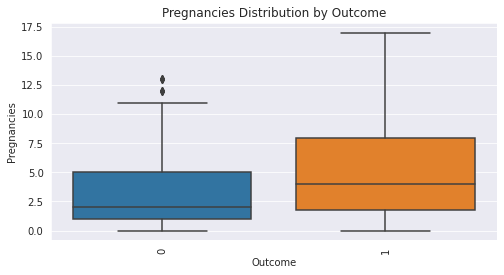

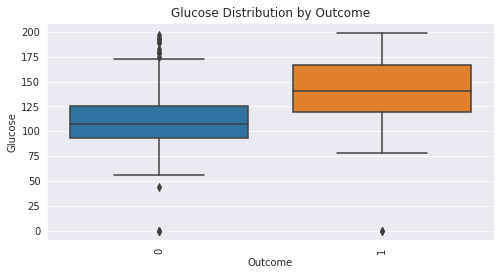

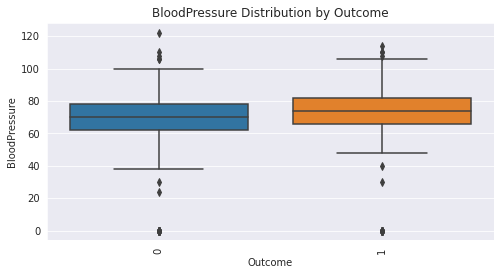

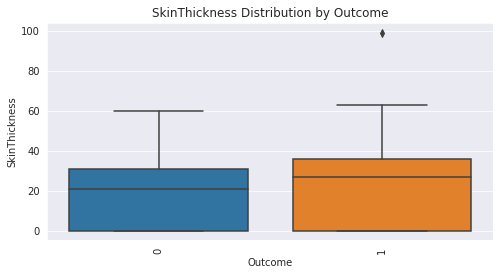

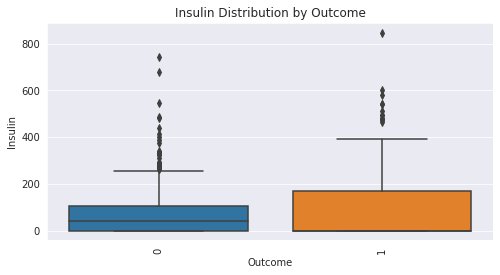

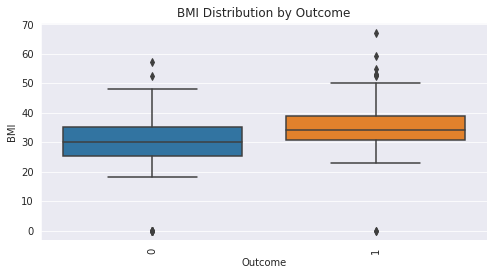

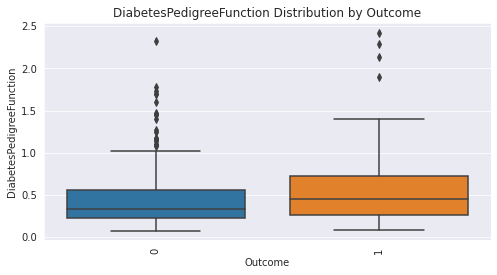

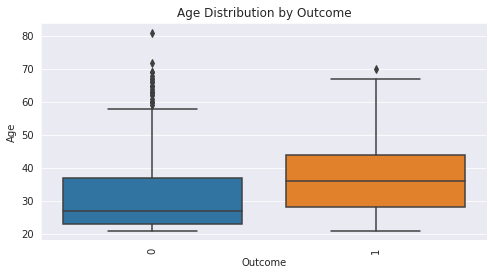

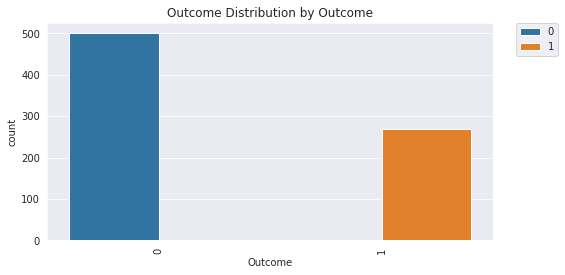

In [10]:
eda_plot_cat(DATAFRAME=df, TARGET='Outcome', MAX_ELEMENTS=15)

Based on this simple EDA (Target vs Features) there is not a clear decision boundary

In [11]:
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True))

0    500
1    268
Name: Outcome, dtype: int64
0    0.651042
1    0.348958
Name: Outcome, dtype: float64


The target is not highly imbalanced

Using 20% sample of the dataset


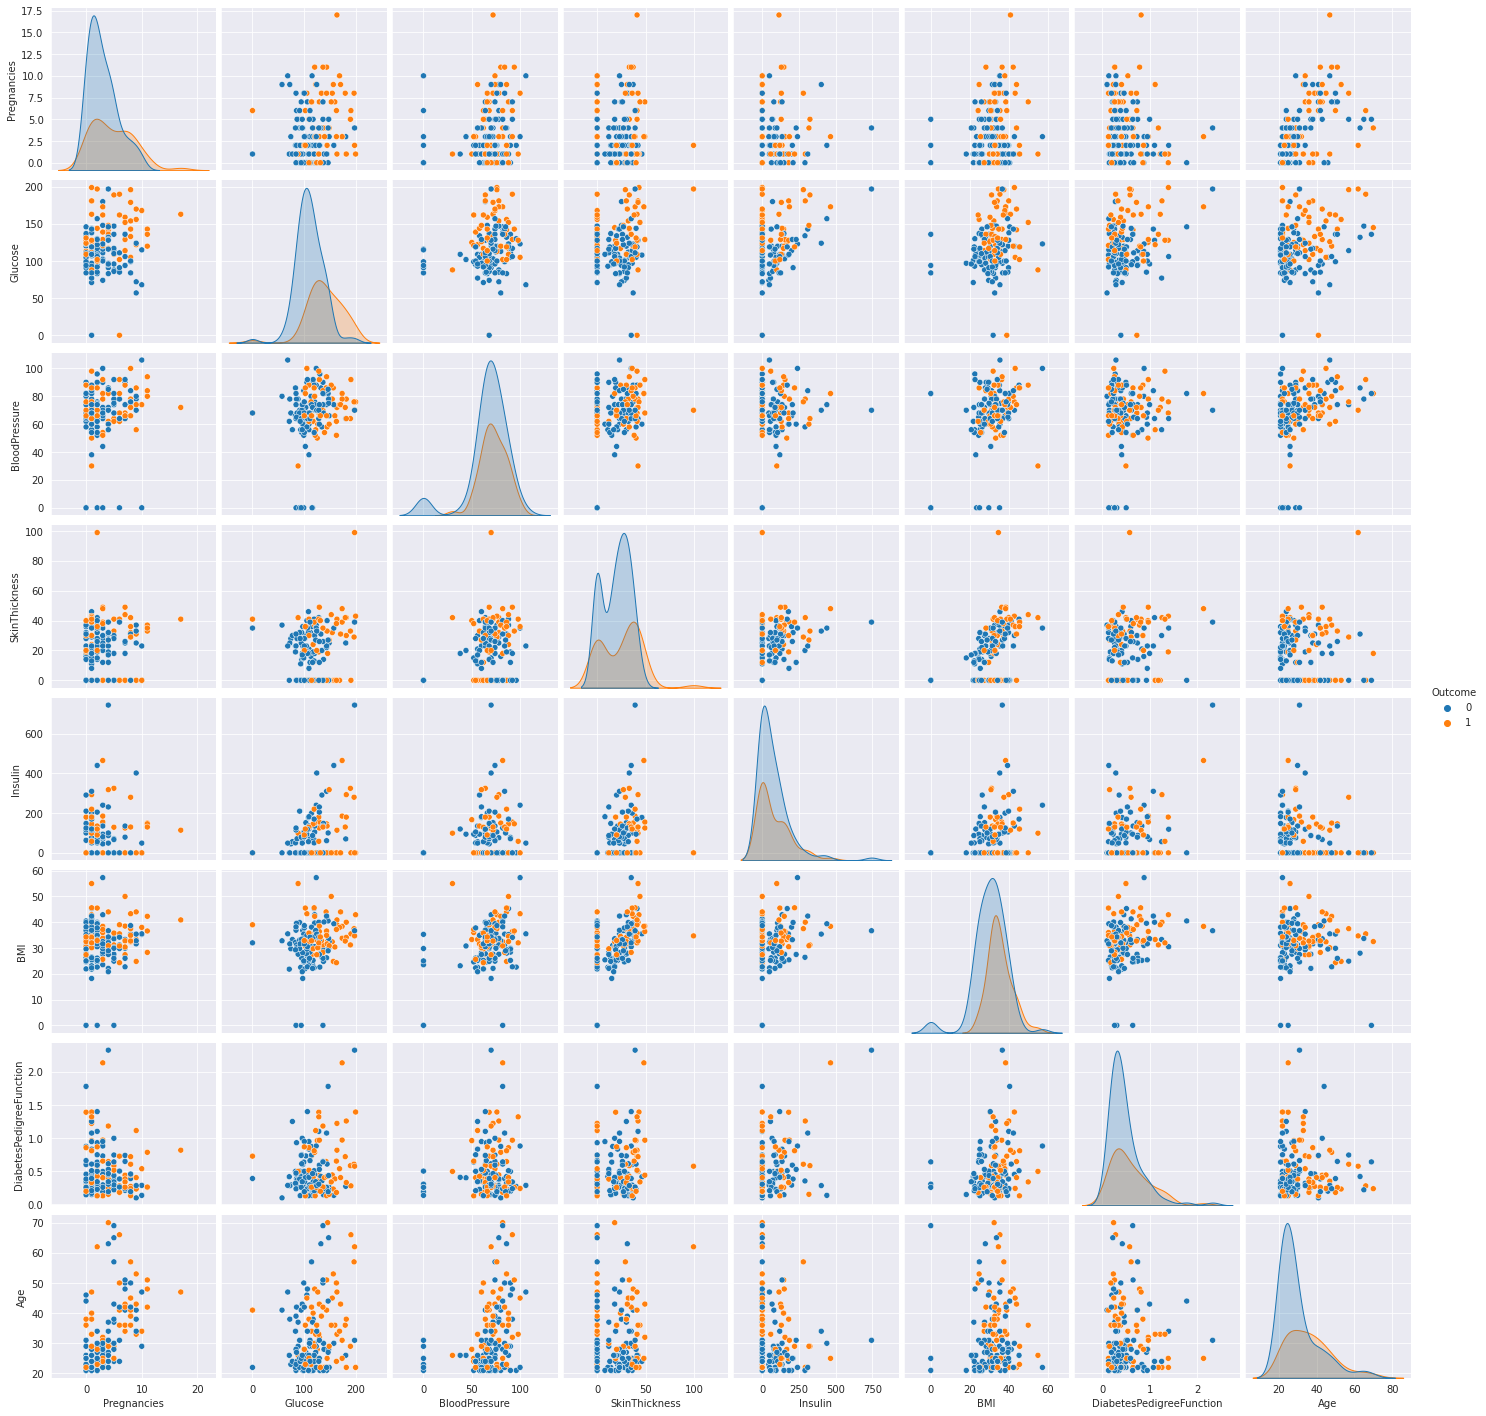

In [12]:
import seaborn as sns
sns.pairplot(df.sample(frac=0.2), hue='Outcome')
print("Using 20% sample of the dataset")

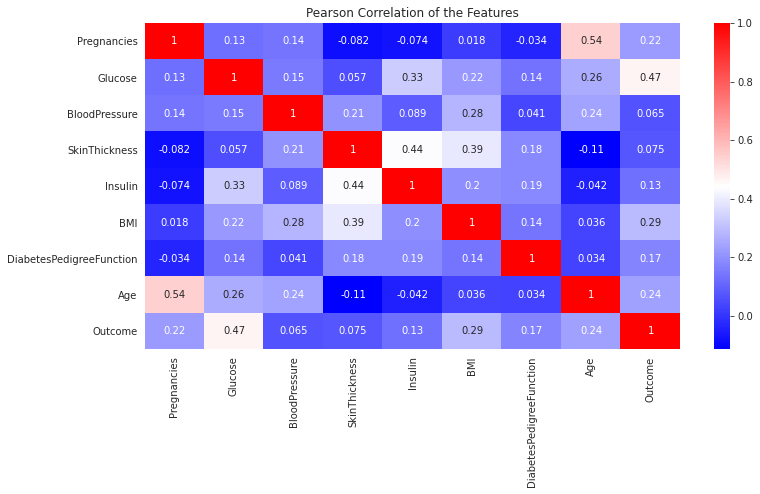

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.title('Pearson Correlation of the Features')
sns.heatmap(df.corr(), cmap='bwr', annot=True)

No significant (pearson) correlation was found between the features of the dataset

## Tensorflow RandomForest Model

In [14]:
train, test = train_test_split(df, test_size=0.3, random_state=1234, stratify=df['Outcome'])

In [15]:
train_ds = tfdf.keras.pd_dataframe_to_tf_dataset(train, label="Outcome")
test_ds = tfdf.keras.pd_dataframe_to_tf_dataset(test, label="Outcome")

In [16]:
tf_model = tfdf.keras.RandomForestModel(max_depth=3, num_trees=5, task = tfdf.keras.Task.CLASSIFICATION)
tf_model.compile(metrics=['accuracy'])
tf_model.fit(train_ds)

9/9 [==============================] - 5s 2ms/step


In [17]:
#Summary of the model
tf_model.summary()

Model: "random_forest_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 1
Trainable params: 0
Non-trainable params: 1
_________________________________________________________________
Type: "RANDOM_FOREST"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (8):
	Age
	BMI
	BloodPressure
	DiabetesPedigreeFunction
	Glucose
	Insulin
	Pregnancies
	SkinThickness

No weights

Variable Importance: NUM_NODES:
    1.                      "BMI"  5.000000 ################
    2.                  "Glucose"  4.000000 ############
    3.                      "Age"  3.000000 ########
    4. "DiabetesPedigreeFunction"  1.000000 
    5.                  "Insulin"  1.000000 
    6.            "SkinThickness"  1.000000 

Variable Importance: NUM_AS_ROOT:
    1.     "Age"  2.000000 ################
    2.     "BMI"  2.000000 ################
    3. "Glucose"  1.000000 

Variable Importance: SUM_SCORE:


In [18]:
#This is a feature available in this library that can be very handy for explainability
tfdf.model_plotter.plot_model_in_colab(tf_model)

In [19]:
tf_model.evaluate(test_ds)

4/4 [==============================] - 0s 4ms/step - loss: 0.0000e+00 - accuracy: 0.7446


[0.0, 0.7445887327194214]

Based on the **evaluate** function, an accuracy of around **74%** was achieved by this model

In [20]:
tfdf_preds = tf_model.predict(tfdf.keras.pd_dataframe_to_tf_dataset(test.drop(columns='Outcome')))
tfdf_preds = np.where(tfdf_preds>0.5, 1,0)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
print(classification_report(test['Outcome'], tfdf_preds))
print(confusion_matrix(test['Outcome'], tfdf_preds))
print("Accuracy Score: {:.4f}".format(accuracy_score(test['Outcome'], tfdf_preds)))
print("F1 Score: {:.4f}: ".format(f1_score(test['Outcome'], tfdf_preds, pos_label=1)))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       150
           1       0.65      0.59      0.62        81

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231

[[124  26]
 [ 33  48]]
Accuracy Score: 0.7446
F1 Score: 0.6194: 


Same accuracy was achieved removing the label from the **predict** function, simulating a "deployment" dataset

## Sklearn RandomForestClassifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
sk_model = RandomForestClassifier(max_depth=3, n_estimators=5, random_state=1234)

In [24]:
sk_model.fit(train.drop(columns='Outcome'), train['Outcome'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=1234,
                       verbose=0, warm_start=False)

In [25]:
sk_preds = sk_model.predict(test.drop(columns='Outcome'))

In [26]:
print(classification_report(test['Outcome'], sk_preds))
print(confusion_matrix(test['Outcome'], sk_preds))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       150
           1       0.71      0.56      0.63        81

    accuracy                           0.77       231
   macro avg       0.75      0.72      0.73       231
weighted avg       0.76      0.77      0.76       231

[[132  18]
 [ 36  45]]


In [27]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
cv = StratifiedKFold(n_splits=5)
f1_cv = cross_val_score(sk_model, test.drop(columns='Outcome'), test['Outcome'], cv=cv, scoring='f1')
acc_cv = cross_val_score(sk_model, test.drop(columns='Outcome'), test['Outcome'], cv=cv, scoring='accuracy')

In [28]:
print("Mean Acc Score - Stratified CV 5 Folds: {:.4f} +/- {:.4f}".format(np.mean(acc_cv), np.std(acc_cv)))
print("Mean F1 Score - Stratified CV 5 Folds: {:.4f} +/- {:.4f}".format(np.mean(f1_cv), np.std(f1_cv)))

Mean Acc Score - Stratified CV 5 Folds: 0.7967 +/- 0.0315
Mean F1 Score - Stratified CV 5 Folds: 0.6761 +/- 0.0677


## Conclusion

In [29]:
summary = {'Model' : ('TensorFlow', 'TensorFlow', 'Sklearn', 'Sklearn'),
           'Metric' :('F1', 'Accuracy','F1', 'Accuracy'),
           'Value' : ((f1_score(test['Outcome'], tfdf_preds, pos_label=1), accuracy_score(test['Outcome'], tfdf_preds), 
                       np.mean(f1_cv), np.mean(acc_cv)))
           }

In [30]:
df_summ = pd.DataFrame(summary)

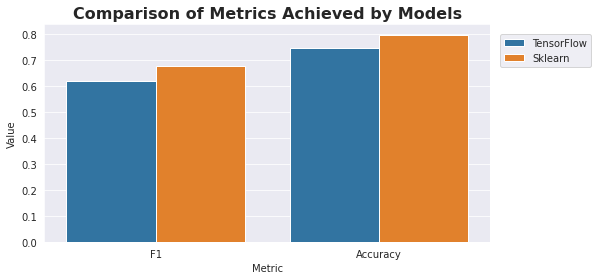

In [31]:
import seaborn as sns
plt.figure(figsize=(8,4))
plt.title("Comparison of Metrics Achieved by Models", fontweight='bold', fontsize=16)
sns.barplot(x='Metric', y='Value', hue='Model', data=df_summ)
plt.legend(loc='best', bbox_to_anchor=(1, 1), borderaxespad=1)

>**At least for this particular dataset and using similar hyperparameters (max_depth, num_estimators/num_trees), Sklearn's Random Forest achieved better performance metrics**

## Drawbacks



*   As of June 2021 there is not a pip-install option for Windows and Mac users 
*   Documentation is not as clear as in Sklearn

